In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/apple/Documents/IT/TERM 6/COMP1844/Bank Customer Churn Prediction.csv')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


In [4]:
df.shape
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [55]:
duplicate_df = df[df.duplicated()]
duplicate_df.shape[0]

0

In [7]:
null_df = df.isnull().sum() # total  number of missing data
null_df

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

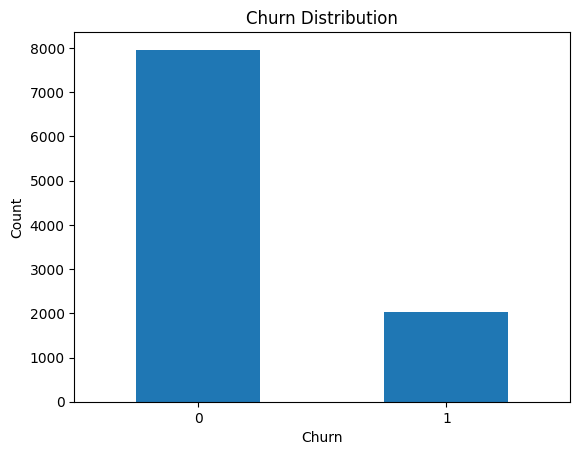

In [57]:
#  churn distribution
churn = df['churn'].value_counts()

# bar chart
churn.plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

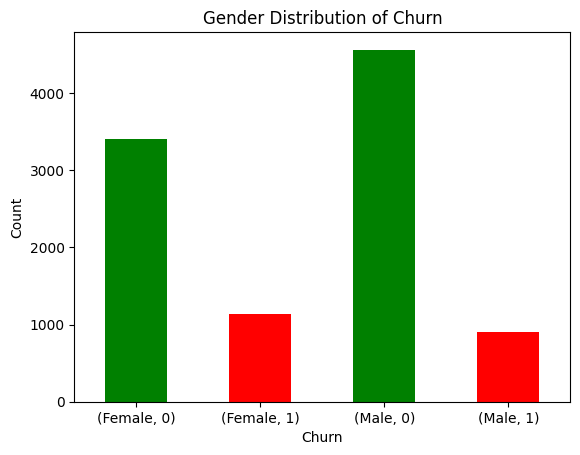

In [63]:
churn_gender = df.groupby(['gender', 'churn']).size()

# bar chart
churn_gender.plot(kind='bar', color=['green', 'red'])
plt.title('Gender Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

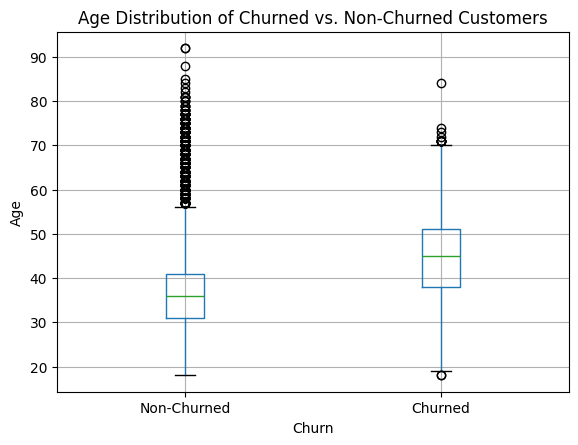

In [20]:
df.boxplot(column='age', by='churn')
plt.suptitle('')
plt.title('Age Distribution of Churned vs. Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.xticks([1, 2], ['Non-Churned', 'Churned'])
plt.show()

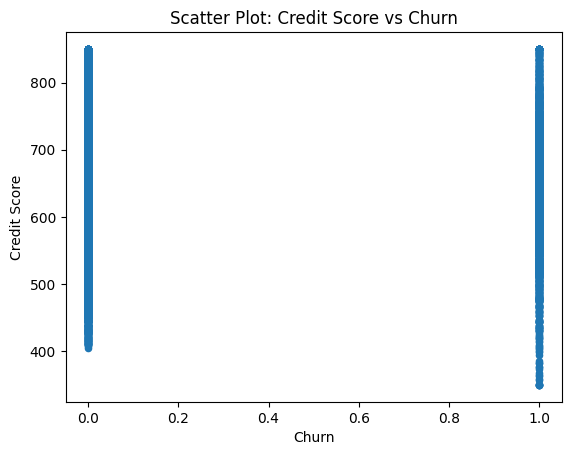

In [5]:
df.plot(kind='scatter',x='churn',y='credit_score')
plt.title('Scatter Plot: Credit Score vs Churn')
plt.xlabel('Churn')
plt.ylabel('Credit Score')
plt.show()

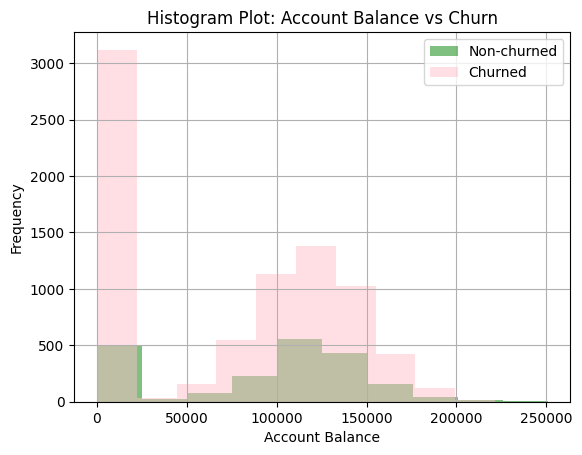

In [7]:
# histogram for non-churned customers
plt.hist(df[df['churn'] == 1]['balance'], color='green', alpha=0.5, label='Non-churned')
# histogram for churned customers
plt.hist(df[df['churn'] == 0]['balance'], color='pink', alpha=0.5, label='Churned')

plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.title('Histogram Plot: Account Balance vs Churn')
plt.legend(loc='upper right')
plt.grid()
plt.show()